In [1]:
# Support Vector Machine

In [2]:
# Import necessary libraries
from sklearn import svm
from sklearn import datasets
# Load the Iris dataset
iris = datasets.load_iris()
# We only take the first two
# features for simplicity
X = iris.data[:, :2]
y = iris.target
# Fit the SVM model
model = svm.SVC(kernel='linear') #klasifikatorius čia!
model.fit(X, y)
# Predict using the SVM model
predictions = model.predict(X)
# Evaluate the predictions
accuracy = model.score(X, y)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.82


In [3]:
# Modelių saugojimas

In [4]:
model = svm.SVC(kernel='linear') #klasifikatorius čia!
model.fit(X, y)

SVC(kernel='linear')

In [5]:
import pickle
import joblib

In [6]:
m_svc_pickle = 'modelis_pickle.pkl'

with open(m_svc_pickle, mode='wb') as file:
    pickle.dump(model,file)

In [7]:
with open(m_svc_pickle, mode='rb') as file:
    modelis = pickle.load(file)

In [8]:
modelis.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [9]:
joblib.dump(model, 'modelis_joblib.saved')

['modelis_joblib.saved']

In [10]:
import os
print(os.getcwd())

c:\Users\manta\OneDrive\Dokumentai\Python projektai\DataScienceNotebooks\Studentai\MantasD


In [11]:
loadedModel = joblib.load('modelis_joblib.saved')

In [12]:
loadedModel.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [13]:
# Regresijų vertinimas

In [14]:
# You will find the following 4 files:
# b2b_gv_vartojimas.xlsx - B2B prosumers
# b2b_ngv_vartojimas.xlsx - B2B consumers
# b2c_gv_vartojimas.xlsx - B2C prosumers
# b2c_ngv_vartojimas.xlsx - B2C consumers
# The goal is to create the most accurate models to predict the next day's (D-1) electricity consumption (24 values). 
# You should create a model that makes the forecast of each hour for the next day at 11:00 a.m. of the current day, because that's 
# how the market works - by 11:00 a.m. you need to provide the Nordpool operator with the volumes of electricity (and prices, but it 
# doesn't matter in this case) that you want to buy every hour the next day.

# An additional task is to create a classifier that allows to classify users as accurately as possible according to their electricity consumption data: 
# 4 classes according to the names of the excel files.

In [15]:
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [16]:
b2b_gv = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/75/b2b_gv_vartojimas.xlsx')

In [17]:
b2b_ngv = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/75/b2b_ngv_vartojimas.xlsx')

In [18]:
b2c_gv = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/75/b2c_gv_vartojimas.xlsx')

In [19]:
b2c_ngv = pd.read_excel('C:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/75/b2c_ngv_vartojimas.xlsx')

In [20]:
b2b_gv

,data_valanda,0,1,2,3,4,5,6,7,8,...,753,754,755,756,757,758,759,760,761,762
0,2022-11-01 00:00:00,0.000,0.0,4.680,0.001,0.000,0.000,1.7159,1.9334,1.4671,...,5.000,0.4199,23.400,0.000,0.000,5.9883,91.900,0.3135,6.9318,2.8310
1,2022-11-01 01:00:00,0.000,0.0,4.340,0.001,0.000,0.000,1.0673,0.5732,1.1481,...,4.700,0.3783,22.440,0.000,0.000,5.2497,90.500,0.2949,5.3964,2.8309
2,2022-11-01 02:00:00,0.000,0.0,4.120,0.000,0.000,0.000,1.3911,1.1709,4.9880,...,4.700,0.3251,22.260,0.000,0.000,4.7670,94.700,0.1766,5.3742,2.8025
3,2022-11-01 03:00:00,0.000,0.0,4.160,0.002,0.000,0.000,1.4227,0.4989,1.2216,...,4.500,0.1573,21.840,0.000,0.000,4.1760,92.000,0.1443,5.5298,2.8072
4,2022-11-01 04:00:00,0.000,0.0,4.520,0.001,0.000,0.000,1.0054,0.5903,1.2296,...,4.500,0.1448,22.080,0.000,0.000,4.2792,89.400,0.1266,5.9279,2.8221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-10-31 20:00:00,5.958,0.0,12.174,0.001,0.042,0.111,1.7820,0.9600,3.0630,...,16.083,0.4550,41.308,3.491,4.573,7.6200,113.410,0.3650,9.9490,7.1860
8756,2023-10-31 21:00:00,6.209,0.0,11.889,0.000,0.041,0.102,1.3011,0.2550,2.3960,...,13.308,0.3630,40.956,3.193,4.114,7.1030,109.267,0.3690,8.0290,6.4380
8757,2023-10-31 22:00:00,5.947,0.0,11.998,0.002,0.049,0.109,1.3996,0.9430,4.3090,...,9.942,0.4380,38.564,3.077,3.868,6.0270,102.868,0.3790,8.0310,7.5130
8758,2023-10-31 23:00:00,4.463,0.0,11.846,0.001,0.049,0.119,1.6896,0.2450,3.4210,...,9.288,0.4390,36.734,3.653,3.171,6.2350,104.722,0.4360,8.2000,5.5660


In [21]:
# pip install openpyxl

In [22]:
b2b_gv_learn = b2b_gv[:-48] ; b2b_gv_learn
b2b_ngv_learn = b2b_ngv[:-48] ; b2b_ngv_learn
b2c_gv_learn = b2c_gv[:-24] ; b2c_gv_learn
b2c_ngv_learn = b2c_ngv[:-24] ; b2c_ngv_learn

,dateTime,0,1,2,3,4,5,6,7,8,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
0,2023-08-01 00:00:00,0.117,0.103,0.041,0.070,0.126,0.048,0.131,0.171,0.347,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
1,2023-08-01 01:00:00,0.501,0.043,0.046,0.120,0.104,0.051,0.110,0.210,0.963,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
2,2023-08-01 02:00:00,0.185,0.052,0.046,0.145,0.066,0.047,0.110,0.195,0.574,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
3,2023-08-01 03:00:00,0.107,0.050,0.045,0.067,0.127,0.049,0.104,0.145,0.429,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
4,2023-08-01 04:00:00,0.118,0.037,0.041,0.124,0.198,0.046,0.179,0.185,0.397,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,2023-10-29 20:00:00,0.388,0.224,0.042,0.627,0.149,0.268,0.197,0.183,0.991,...,0.148,0.224,1.422,0.142,0.377,0.249,0.210,0.298,0.0,0.0
2157,2023-10-29 21:00:00,0.437,0.291,0.042,0.270,0.151,0.268,0.108,0.180,0.942,...,0.115,0.246,0.535,0.108,0.317,0.171,0.171,0.139,0.0,0.0
2158,2023-10-29 22:00:00,0.561,0.229,0.144,0.191,0.188,0.262,0.089,0.186,0.408,...,0.109,0.155,0.756,0.120,0.159,0.151,0.120,0.226,0.0,0.0
2159,2023-10-29 23:00:00,0.453,0.246,0.195,0.103,0.127,0.552,0.114,0.214,0.938,...,0.094,0.088,0.423,0.100,0.114,0.157,0.105,0.079,0.0,0.0


In [23]:
b2b_gv_learn['month'] = pd.to_datetime(b2b_gv_learn['data_valanda']).dt.month
b2b_gv_learn['week'] = pd.to_datetime(b2b_gv_learn['data_valanda']).dt.weekday
b2b_gv_learn['day'] = pd.to_datetime(b2b_gv_learn['data_valanda']).dt.day
b2b_gv_learn['hour'] = pd.to_datetime(b2b_gv_learn['data_valanda']).dt.hour
b2b_ngv_learn['month'] = pd.to_datetime(b2b_ngv_learn['data_valanda']).dt.month
b2b_ngv_learn['week'] = pd.to_datetime(b2b_ngv_learn['data_valanda']).dt.weekday
b2b_ngv_learn['day'] = pd.to_datetime(b2b_ngv_learn['data_valanda']).dt.day
b2b_ngv_learn['hour'] = pd.to_datetime(b2b_ngv_learn['data_valanda']).dt.hour
b2c_gv_learn['month'] = pd.to_datetime(b2c_gv_learn['dateTime']).dt.month
b2c_gv_learn['week'] = pd.to_datetime(b2c_gv_learn['dateTime']).dt.weekday
b2c_gv_learn['day'] = pd.to_datetime(b2c_gv_learn['dateTime']).dt.day
b2c_gv_learn['hour'] = pd.to_datetime(b2c_gv_learn['dateTime']).dt.hour
b2c_ngv_learn['month'] = pd.to_datetime(b2c_ngv_learn['dateTime']).dt.month
b2c_ngv_learn['week'] = pd.to_datetime(b2c_ngv_learn['dateTime']).dt.weekday
b2c_ngv_learn['day'] = pd.to_datetime(b2c_ngv_learn['dateTime']).dt.day
b2c_ngv_learn['hour'] = pd.to_datetime(b2c_ngv_learn['dateTime']).dt.hour

In [24]:
datefrom = datetime(2023,9,1,0)
dateto = datetime(2023,10,30,0)
b2b_gv_learn_filtered = b2b_gv_learn.query('data_valanda > @datefrom & data_valanda < @dateto')
b2b_ngv_learn_filtered = b2b_ngv_learn.query('data_valanda > @datefrom & data_valanda < @dateto')
b2c_gv_learn_filtered = b2c_gv_learn.query('dateTime > @datefrom & dateTime < @dateto')
b2c_ngv_learn_filtered = b2c_ngv_learn.query('dateTime > @datefrom & dateTime < @dateto')

In [25]:
columns_to_sum_b2bgv = b2b_gv_learn_filtered.drop(columns=['data_valanda', 'month', 'week', 'day', 'hour']).columns
columns_to_sum_b2bngv = b2b_ngv_learn_filtered.drop(columns=['data_valanda', 'month', 'week', 'day', 'hour']).columns
columns_to_sum_b2cgv = b2c_gv_learn_filtered.drop(columns=['dateTime', 'month', 'week', 'day', 'hour']).columns
columns_to_sum_b2cngv = b2c_ngv_learn_filtered.drop(columns=['dateTime', 'month', 'week', 'day', 'hour']).columns


In [26]:
b2b_gv_learn_filtered['viso'] = b2b_gv_learn_filtered[columns_to_sum_b2bgv].sum(axis=1)
b2b_ngv_learn_filtered['viso'] = b2b_ngv_learn_filtered[columns_to_sum_b2bngv].sum(axis=1)
b2c_gv_learn_filtered['viso'] = b2c_gv_learn_filtered[columns_to_sum_b2cgv].sum(axis=1)
b2c_ngv_learn_filtered['viso'] = b2c_ngv_learn_filtered[columns_to_sum_b2cngv].sum(axis=1)

In [27]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [28]:
X_b2bgv = b2b_gv_learn_filtered[['month', 'week', 'day', 'hour']]
y_b2bgv = b2b_gv_learn_filtered['viso']
X_b2bngv = b2b_ngv_learn_filtered[['month', 'week', 'day', 'hour']]
y_b2bngv = b2b_ngv_learn_filtered['viso']
X_b2cgv = b2c_gv_learn_filtered[['month', 'week', 'day', 'hour']]
y_b2cgv = b2c_gv_learn_filtered['viso']
X_b2cngv = b2c_ngv_learn_filtered[['month', 'week', 'day', 'hour']]
y_b2cngv = b2c_ngv_learn_filtered['viso']

In [29]:
X_train_b2bgv, X_test_b2bgv, y_train_b2bgv, y_test_b2bgv = train_test_split(X_b2bgv, y_b2bgv, test_size=0.20, random_state=23)
X_train_b2bngv, X_test_b2bngv, y_train_b2bngv, y_test_b2bngv = train_test_split(X_b2bngv, y_b2bngv, test_size=0.20, random_state=23)
X_train_b2cgv, X_test_b2cgv, y_train_b2cgv, y_test_b2cgv = train_test_split(X_b2cgv, y_b2cgv, test_size=0.20, random_state=23)
X_train_b2cngv, X_test_b2cngv, y_train_b2cngv, y_test_b2cngv = train_test_split(X_b2cngv, y_b2cngv, test_size=0.20, random_state=23)

In [30]:
linear_b2bgv = LinearRegression().fit(X_train_b2bgv, y_train_b2bgv)
pred_b2bgv = linear_b2bgv.predict(X_test_b2bgv)
print(f'b2b_gv linijinės vertinimas: {linear_b2bgv.score(X_test_b2bgv, y_test_b2bgv)*100.0}')
linear_b2bngv = LinearRegression().fit(X_train_b2bngv, y_train_b2bngv)
pred_b2bngv = linear_b2bngv.predict(X_test_b2bngv)
print(f'b2b_ngv linijinės vertinimas: {linear_b2bngv.score(X_test_b2bngv, y_test_b2bngv)*100.0}')
linear_b2cgv = LinearRegression().fit(X_train_b2cgv, y_train_b2cgv)
pred_b2cgv = linear_b2cgv.predict(X_test_b2cgv)
print(f'b2c_gv linijinės vertinimas: {linear_b2cgv.score(X_test_b2cgv, y_test_b2cgv)*100.0}')
linear_b2cngv = LinearRegression().fit(X_train_b2cngv, y_train_b2cngv)
pred_b2cngv = linear_b2cngv.predict(X_test_b2cngv)
print(f'b2c_ngv linijinės vertinimas: {linear_b2cngv.score(X_test_b2cngv, y_test_b2cngv)*100.0}')

b2b_gv linijinės vertinimas: 28.806417704626607
b2b_ngv linijinės vertinimas: 13.061907180281796
b2c_gv linijinės vertinimas: 45.60023124526309
b2c_ngv linijinės vertinimas: 59.533872878754465


In [31]:
decision_b2bgv = DecisionTreeRegressor(random_state = 0).fit(X_train_b2bgv, y_train_b2bgv)
pred_b2bgv = decision_b2bgv.predict(X_test_b2bgv)
print(f'b2b_gv Decision tree vertinimas: {decision_b2bgv.score(X_test_b2bgv, y_test_b2bgv)*100.0}')
decision_b2bngv = DecisionTreeRegressor(random_state = 0).fit(X_train_b2bngv, y_train_b2bngv)
pred_b2bngv = decision_b2bngv.predict(X_test_b2bngv)
print(f'b2b_ngv Decision tree vertinimas: {decision_b2bngv.score(X_test_b2bngv, y_test_b2bngv)*100.0}')
decision_b2cgv = DecisionTreeRegressor(random_state = 0).fit(X_train_b2cgv, y_train_b2cgv)
pred_b2cgv = decision_b2cgv.predict(X_test_b2cgv)
print(f'b2c_gv Decision tree vertinimas: {decision_b2cgv.score(X_test_b2cgv, y_test_b2cgv)*100.0}')
decision_b2cngv = DecisionTreeRegressor(random_state = 0).fit(X_train_b2cngv, y_train_b2cngv)
pred_b2cngv = decision_b2cngv.predict(X_test_b2cngv)
print(f'b2c_ngv Decision tree vertinimas: {decision_b2cngv.score(X_test_b2cngv, y_test_b2cngv)*100.0}')

b2b_gv Decision tree vertinimas: 96.54934403117102
b2b_ngv Decision tree vertinimas: 97.14862474216763
b2c_gv Decision tree vertinimas: 95.95151760160127
b2c_ngv Decision tree vertinimas: 96.75243572132386


In [32]:
# regressor = DecisionTreeRegressor(random_state = 0)
# regressor.fit(X_train, y_train)
# pred = regressor.predict(X_test)
# regressor.score(X_test, y_test)*100.0

In [33]:
# Iki čia padaryta

In [34]:
random_b2bgv = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_b2bgv, y_train_b2bgv)
pred_b2bgv = random_b2bgv.predict(X_test_b2bgv)
print(f'b2b_gv Random forest vertinimas: {random_b2bgv.score(X_test_b2bgv, y_test_b2bgv)*100.0}')
random_b2bngv = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_b2bngv, y_train_b2bngv)
pred_b2bngv = random_b2bngv.predict(X_test_b2bngv)
print(f'b2b_ngv Random forest vertinimas: {random_b2bngv.score(X_test_b2bngv, y_test_b2bngv)*100.0}')
random_b2cgv = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_b2cgv, y_train_b2cgv)
pred_b2cgv = random_b2cgv.predict(X_test_b2cgv)
print(f'b2c_gv Random forest vertinimas: {random_b2cgv.score(X_test_b2cgv, y_test_b2cgv)*100.0}')
random_b2cngv = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_b2cngv, y_train_b2cngv)
pred_b2cngv = random_b2cngv.predict(X_test_b2cngv)
print(f'b2c_ngv Random forest vertinimas: {random_b2cngv.score(X_test_b2cngv, y_test_b2cngv)*100.0}')

b2b_gv Random forest vertinimas: 96.97281059627507
b2b_ngv Random forest vertinimas: 98.50367503461379
b2c_gv Random forest vertinimas: 97.71742680121214
b2c_ngv Random forest vertinimas: 98.18673187376096


In [36]:
# model = RandomForestRegressor(n_estimators=1000, random_state=42)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# model.score(X_test, y_test)*100.0

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Funkcija, kuri sukuria datetime intervalą
def generate_datetime_range(start, end, freq='H'):
    """
    Sukuria datetime objektų intervalą nuo `start` iki `end` su nurodytu dažniu.
    
    :param start: Pradžios data (datetime objektas arba string formatu 'YYYY-MM-DD HH:MM').
    :param end: Pabaigos data (datetime objektas arba string formatu 'YYYY-MM-DD HH:MM').
    :param freq: Dažnis (pvz., 'H' - valandoms, 'D' - dienoms).
    :return: Pandas DataFrame su datetime objektu ir išskirtais 'month', 'week', 'day', 'hour'.
    """
    date_range = pd.date_range(start=start, end=end, freq=freq)
    df = pd.DataFrame({'datetime': date_range})
    df['month'] = df['datetime'].dt.month
    df['week'] = df['datetime'].dt.isocalendar().week
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    return df

start_date = '2023-10-30 01:00'
end_date = '2023-10-31 00:00'

b2bgv = generate_datetime_range(start=start_date, end=end_date)
b2bngv = generate_datetime_range(start=start_date, end=end_date)
b2cgv = generate_datetime_range(start=start_date, end=end_date)
b2cngv = generate_datetime_range(start=start_date, end=end_date)

X_b2bgv = b2bgv[['month', 'week', 'day', 'hour']] 
X_b2bngv = b2bngv[['month', 'week', 'day', 'hour']]
X_b2cgv = b2cgv[['month', 'week', 'day', 'hour']]
X_b2cngv = b2cngv[['month', 'week', 'day', 'hour']] 


b2bgv['linear'] = linear_b2bgv.predict(X_b2bgv)
b2bngv['linear'] = linear_b2bngv.predict(X_b2bngv)
b2cgv['linear'] = linear_b2cgv.predict(X_b2cgv)
b2cngv['linear'] = linear_b2cngv.predict(X_b2cngv)

b2bgv['decision_tree'] = decision_b2bgv.predict(X_b2bgv)
b2bngv['decision_tree'] = decision_b2bngv.predict(X_b2bngv)
b2cgv['decision_tree'] = decision_b2cgv.predict(X_b2cgv)
b2cngv['decision_tree'] = decision_b2cngv.predict(X_b2cngv)

b2bgv['random_frorest'] = random_b2bgv.predict(X_b2bgv)
b2bngv['random_frorest'] = random_b2bngv.predict(X_b2bngv)
b2cgv['random_frorest'] = random_b2cgv.predict(X_b2cgv)
b2cngv['random_frorest'] = random_b2cngv.predict(X_b2cngv)




In [38]:
datefrom = datetime(2023,10,30,1)
dateto = datetime(2023,10,31,0)
b2b_gv_merge = b2b_gv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2b_ngv_merge = b2b_ngv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2c_gv_merge = b2c_gv.query('dateTime > @datefrom & dateTime < @dateto')
b2c_ngv_merge = b2c_ngv.query('dateTime > @datefrom & dateTime < @dateto')

In [39]:
columns_to_sum_b2bgv = b2b_gv_merge.drop(columns=['data_valanda']).columns
columns_to_sum_b2bngv = b2b_ngv_merge.drop(columns=['data_valanda']).columns
columns_to_sum_b2cgv = b2c_gv_merge.drop(columns=['dateTime']).columns
columns_to_sum_b2cngv = b2c_ngv_merge.drop(columns=['dateTime']).columns

In [40]:
b2b_gv_merge['faktas'] = b2b_gv_merge[columns_to_sum_b2bgv].sum(axis=1)
b2b_ngv_merge['faktas'] = b2b_ngv_merge[columns_to_sum_b2bngv].sum(axis=1)
b2c_gv_merge['faktas'] = b2c_gv_merge[columns_to_sum_b2cgv].sum(axis=1)
b2c_ngv_merge['faktas'] = b2c_ngv_merge[columns_to_sum_b2cngv].sum(axis=1)

In [41]:
b2b_gv_merge['datetime'] = b2b_gv_merge['data_valanda']
b2b_ngv_merge['datetime'] = b2b_ngv_merge['data_valanda']
b2c_gv_merge['datetime'] = b2c_gv_merge['dateTime']
b2c_ngv_merge['datetime'] = b2c_ngv_merge['dateTime']

In [42]:
b2b_gv_merge = b2b_gv_merge[['datetime', 'faktas']]
b2b_ngv_merge = b2b_ngv_merge[['datetime', 'faktas']]
b2c_gv_merge = b2c_gv_merge[['datetime', 'faktas']]
b2c_ngv_merge = b2c_ngv_merge[['datetime', 'faktas']]

In [43]:
b2bgv = pd.merge(b2bgv,b2b_gv_merge, on='datetime')
b2bngv = pd.merge(b2bngv,b2b_ngv_merge, on='datetime')
b2cgv = pd.merge(b2cgv,b2c_gv_merge, on='datetime')
b2cngv = pd.merge(b2cngv,b2c_ngv_merge, on='datetime')

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
b2bgv = b2bgv.drop(columns=['month', 'week', 'day', 'hour'])
b2bngv = b2bngv.drop(columns=['month', 'week', 'day', 'hour'])
b2cgv = b2cgv.drop(columns=['month', 'week', 'day', 'hour'])
b2cngv = b2cngv.drop(columns=['month', 'week', 'day', 'hour'])

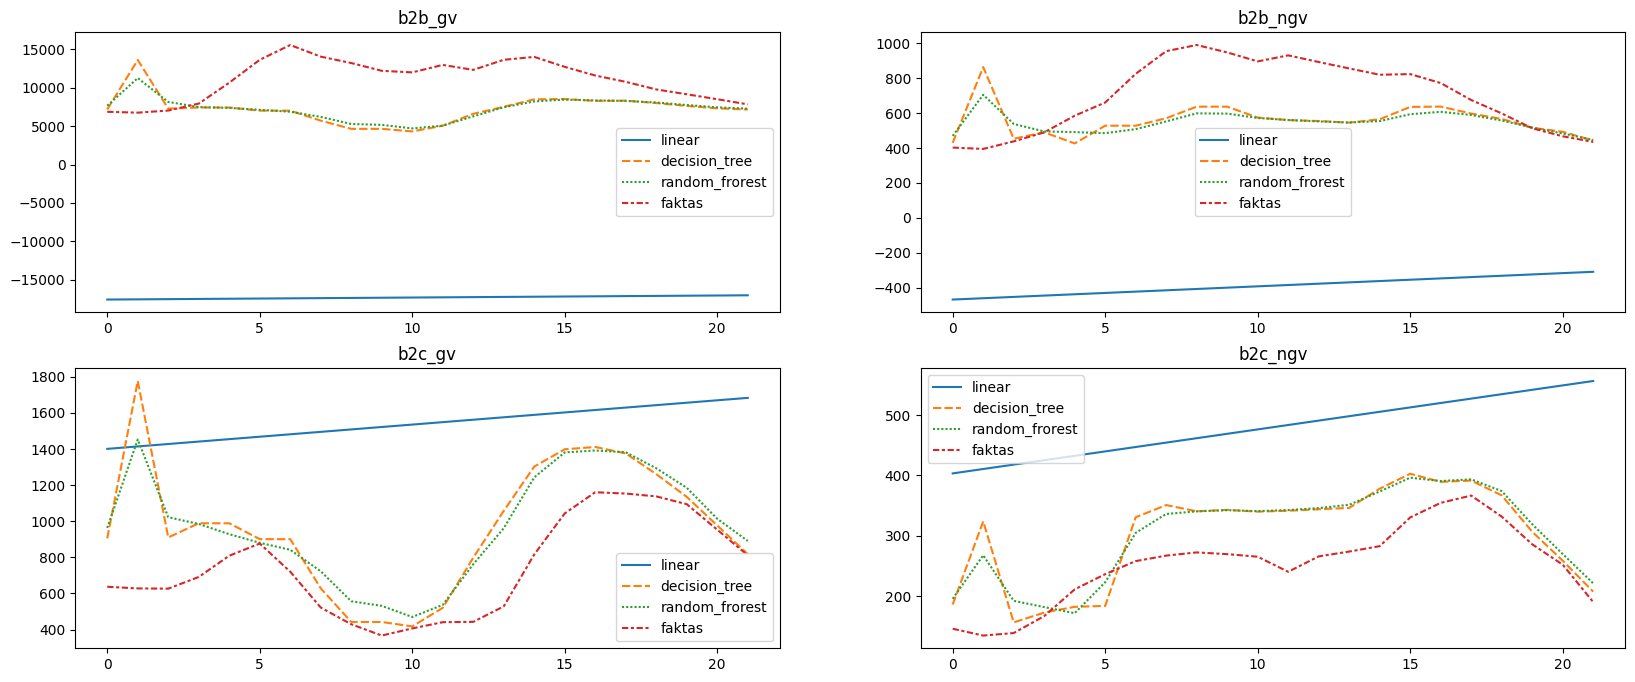

In [46]:
fig, axes = plt.subplots(2,2,figsize=(20,8))
axes[0,0].set_title(f'b2b_gv')
sns.lineplot(data=b2bgv,ax=axes[0,0])
axes[0,1].set_title(f'b2b_ngv')
sns.lineplot(data=b2bngv,ax=axes[0,1])
axes[1,0].set_title(f'b2c_gv')
sns.lineplot(data=b2cgv,ax=axes[1,0])
axes[1,1].set_title(f'b2c_ngv')
sns.lineplot(data=b2cngv,ax=axes[1,1])
plt.show()

In [47]:
# Projektas
# Elektros energijos suvartojimo prognozė, atsižvelgiant į oro sąlygas
# Užduotis:
# Sukurti ir pateikti modelius, skirtus prognozuoti elektros energijos suvartojimą 24-rioms valandoms į
# priekį, atsižvelgiant į (prognozuojamas) oro sąlygas. Modeliams pateikus tikėtinas ateities oro sąlygas,
# modeliai turi pateikti 24-rių valandų energijos poreikio įvertinimą. Pradiniai testiniai duomenys: bet kuri
# diena tarp 2023-čių rugpjūčio 01 ir spalio 30-tos dienos. Vėliau išbandykite suprognozuoti elektros
# vartojimą realiai sekančiai dienai, ir palyginkite su Nordpool duomenimsi.prognoze.
# Istoriniai orų duomenys pasiekiami čia: https://archyvas.meteo.lt/
# Bendras LT energijos suvartojimas kas valandą pasiekiamas čia:
# https://data.nordpoolgroup.com/auction/day-ahead/volumes?deliveryDate=2025-01-09&deliveryAreas=LT,AT
# Prognozuojami orai pasiekiami per meteo.lt API.
# Pritaikykite DecisionTreeRegressor, Linear, ectorMachinSupportVe, RandomForestRegressor.
# Papildomas punktas : SupportVectorMachine palaiko skirtingus kernel’ius duomenų fitinimui – linear,

# poly, rbf. Plačiau čia: https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-
# linear-kernels-in-scikit-learn/

# Išrinkite geriausią kernel’į SVR modeliui ir SVR modelio prognozes pateikite tik su geriausiu kernel’iu.
# Prieš pateikdami modelius, nustatykite, kokie parametrai turi daugiausiai įtakos prognozei (hint –
# koreliacijos matrica ir heatmap vizualizacija). Su pairplot pateikite atsirinktų parametrų tarpusavio
# priklausomybes.
# Pateikdami modelių prognozes, arba ieškodami geriausio modelio, geriausio kernel’io, taip pat pateikite
# jų įvertinimus (vidurkiai, standartiniai nuokrypiai, etc ... ).
# Pateikite modelių prognozes vizualizuodami jas.
# Papildomi reikalavimai:
# Sugeneruoti grafikai (vizualizacijos) turi būti automatiškai saugomi į projekto aplanką bei automatiškai
# dedami į docx failą.
# Matplotlib’o figūra gali būti saugojama į PNG su komanda .savefig().
# Plačiau čia: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
# Docx failo generavimas https://python-docx.readthedocs.io/en/latest/
# Duotoje nuorodoje pateikiamas minimalus veikiantis pavyzdys, kuriame sukuriamas Word docx
# dokumentas, į jį įterpiamas tekstas, paveikslai.
# https://data.nordpoolgroup.com/power-system/consumption?deliveryDate=2025-01-09&deliveryAreas=AT&aggregation=DeliveryPeriod

In [48]:
datefrom = datetime(2023,7,31,23)
dateto = datetime(2023,10,30,0)
b2b_gv_filtered = b2b_gv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2b_ngv_filtered = b2b_ngv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2c_gv_filtered = b2c_gv.query('dateTime > @datefrom & dateTime < @dateto')
b2c_ngv_filtered = b2c_ngv.query('dateTime > @datefrom & dateTime < @dateto')

In [ ]:
b2b_ngv_filtered

,data_valanda,0,1,2,3,4,5,6,7,8,...,789,790,791,792,793,794,795,796,797,798
6551,2023-08-01 00:00:00,0.0,0,0.015,0.0,0.0,0.0,0.0,0.019,0.0,...,0.068,0.062,0.256,0.032,0.021,0.006,0.001,0.008,0.0,0.0
6552,2023-08-01 01:00:00,0.0,0,0.012,0.0,0.0,0.0,0.0,0.021,0.0,...,0.069,0.055,0.092,0.032,0.049,0.007,0.001,0.008,0.0,0.0
6553,2023-08-01 02:00:00,0.0,0,0.014,0.0,0.0,0.0,0.0,0.020,0.0,...,0.061,0.063,0.060,0.031,0.042,0.006,0.002,0.007,0.0,0.0
6554,2023-08-01 03:00:00,0.0,0,0.012,0.0,0.0,0.0,0.0,0.018,0.0,...,0.066,0.064,0.057,0.031,0.025,0.006,0.001,0.008,0.0,0.0
6555,2023-08-01 04:00:00,0.0,0,0.014,0.0,0.0,0.0,0.0,0.018,0.0,...,0.068,0.054,0.057,0.033,0.052,0.007,0.002,0.008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8706,2023-10-29 19:00:00,0.0,0,0.016,0.0,0.0,0.0,0.0,0.021,0.0,...,0.049,0.047,0.079,0.130,1.520,0.018,0.000,0.000,0.0,0.0
8707,2023-10-29 20:00:00,0.0,0,0.016,0.0,0.0,0.0,0.0,0.022,0.0,...,0.048,0.048,0.081,0.059,1.412,0.016,0.000,0.000,0.0,0.0
8708,2023-10-29 21:00:00,0.0,0,0.016,0.0,0.0,0.0,0.0,0.022,0.0,...,0.048,0.047,0.294,0.032,1.127,0.018,0.000,0.000,0.0,0.0
8709,2023-10-29 22:00:00,0.0,0,0.018,0.0,0.0,0.0,0.0,0.022,0.0,...,0.050,0.053,0.050,0.032,1.097,0.012,0.000,0.000,0.0,0.0


In [49]:
columns_to_sum_b2bgv = b2b_gv_filtered.drop(columns=['data_valanda']).columns
columns_to_sum_b2bngv = b2b_ngv_filtered.drop(columns=['data_valanda']).columns
columns_to_sum_b2cgv = b2c_gv_filtered.drop(columns=['dateTime']).columns
columns_to_sum_b2cngv = b2c_ngv_filtered.drop(columns=['dateTime']).columns

In [50]:
b2b_gv_filtered['b2b_gv'] = b2b_gv_filtered[columns_to_sum_b2bgv].sum(axis=1)
b2b_ngv_filtered['b2b_ngv'] = b2b_ngv_filtered[columns_to_sum_b2bngv].sum(axis=1)
b2c_gv_filtered['b2c_gv'] = b2c_gv_filtered[columns_to_sum_b2cgv].sum(axis=1)
b2c_ngv_filtered['b2c_ngv'] = b2c_ngv_filtered[columns_to_sum_b2cngv].sum(axis=1)

In [51]:
b2b_gv_filtered['datetime'] = b2b_gv_filtered['data_valanda']
b2b_ngv_filtered['datetime'] = b2b_ngv_filtered['data_valanda']
b2c_gv_filtered['datetime'] = b2c_gv_filtered['dateTime']
b2c_ngv_filtered['datetime'] = b2c_ngv_filtered['dateTime']

In [52]:
b2b_gv_filtered = b2b_gv_filtered[['datetime', 'b2b_gv']]
b2b_ngv_filtered = b2b_ngv_filtered[['datetime', 'b2b_ngv']]
b2c_gv_filtered = b2c_gv_filtered[['datetime', 'b2c_gv']]
b2c_ngv_filtered = b2c_ngv_filtered[['datetime', 'b2c_ngv']]

In [53]:
gam_vart = pd.merge(b2b_gv_filtered,b2c_gv_filtered,how='left', on='datetime')
neg_vart = pd.merge(b2b_ngv_filtered,b2c_ngv_filtered,how='left', on='datetime')

In [14]:
gam_vart.columns

Index(['datetime', 'b2b_gv', 'b2c_gv'], dtype='object')

In [138]:
neg_vart.columns

Index(['datetime', 'b2b_ngv', 'b2c_ngv'], dtype='object')

In [54]:
gam_vart['Gaminantys'] = gam_vart[['b2b_gv', 'b2c_gv']].sum(axis=1)
neg_vart['Negaminantys'] = neg_vart[['b2b_ngv', 'b2c_ngv']].sum(axis=1)

In [55]:
gam_vart = gam_vart[['datetime','Gaminantys']]
neg_vart = neg_vart[['datetime','Negaminantys']]
df_for_learn = pd.merge(gam_vart,neg_vart,how='left', on='datetime')

In [17]:
df_for_learn

,datetime,Gaminantys,Negaminantys
0,2023-08-01 00:00:00,7017.462790,510.759334
1,2023-08-01 01:00:00,6830.855757,469.344333
2,2023-08-01 02:00:00,6681.877246,432.295334
3,2023-08-01 03:00:00,6604.817630,420.801000
4,2023-08-01 04:00:00,6875.745963,422.349333
...,...,...,...
2155,2023-10-29 19:00:00,9693.188468,988.985812
2156,2023-10-29 20:00:00,9270.997265,933.634510
2157,2023-10-29 21:00:00,8770.581333,823.117711
2158,2023-10-29 22:00:00,8294.118999,751.613663


In [56]:
df_for_learn['month'] = pd.to_datetime(df_for_learn['datetime']).dt.month
df_for_learn['week'] = pd.to_datetime(df_for_learn['datetime']).dt.weekday
df_for_learn['hour'] = pd.to_datetime(df_for_learn['datetime']).dt.hour

In [57]:
orai = pd.read_json('../../../weather_data_vilnius.json')

In [58]:
orai['datetime'] = pd.to_datetime(orai['obs_time_utc'])

In [ ]:
orai

,obs_time_utc,station_code,air_temperature,feels_like_temperature,wind_speed,wind_gust,wind_direction,cloud_cover,sea_level_pressure,relative_humidity,precipitation,condition_code,datetime
0,2023-08-01 00:00:00,vilniaus-ams,14.8,14.8,2.1,3.2,165,25.0,1007.7,82,0.0,partly-cloudy,2023-08-01 00:00:00
1,2023-08-01 01:00:00,vilniaus-ams,13.8,13.8,1.5,2.6,150,25.0,1008.0,87,0.0,partly-cloudy,2023-08-01 01:00:00
2,2023-08-01 02:00:00,vilniaus-ams,13.6,13.6,1.7,2.8,142,50.0,1007.6,86,0.0,variable-cloudiness,2023-08-01 02:00:00
3,2023-08-01 03:00:00,vilniaus-ams,13.5,13.5,1.3,2.8,146,100.0,1007.5,87,0.0,cloudy,2023-08-01 03:00:00
4,2023-08-01 04:00:00,vilniaus-ams,15.0,15.0,1.6,2.9,142,0.0,1007.0,82,0.0,clear,2023-08-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2023-10-31 19:00:00,vilniaus-ams,14.2,14.2,4.3,10.7,203,100.0,998.9,74,0.0,cloudy,2023-10-31 19:00:00
2204,2023-10-31 20:00:00,vilniaus-ams,13.7,13.7,3.6,7.0,191,100.0,999.1,79,0.0,cloudy,2023-10-31 20:00:00
2205,2023-10-31 21:00:00,vilniaus-ams,13.4,13.4,2.7,7.2,201,100.0,998.9,83,0.0,cloudy,2023-10-31 21:00:00
2206,2023-10-31 22:00:00,vilniaus-ams,12.1,12.1,2.2,4.7,188,88.0,998.8,88,0.0,cloudy,2023-10-31 22:00:00


In [59]:
orai_for_merge = orai[['datetime', 'air_temperature', 'wind_speed', 'cloud_cover']]

In [60]:
orai_for_merge = orai_for_merge.dropna(subset=['cloud_cover'])

In [24]:
orai_for_merge

,datetime,air_temperature,wind_speed,cloud_cover
0,2023-08-01 00:00:00,14.8,2.1,25.0
1,2023-08-01 01:00:00,13.8,1.5,25.0
2,2023-08-01 02:00:00,13.6,1.7,50.0
3,2023-08-01 03:00:00,13.5,1.3,100.0
4,2023-08-01 04:00:00,15.0,1.6,0.0
...,...,...,...,...
2203,2023-10-31 19:00:00,14.2,4.3,100.0
2204,2023-10-31 20:00:00,13.7,3.6,100.0
2205,2023-10-31 21:00:00,13.4,2.7,100.0
2206,2023-10-31 22:00:00,12.1,2.2,88.0


In [61]:
df_learn = pd.merge(df_for_learn,orai_for_merge, on='datetime')

In [26]:
df_learn

,datetime,Gaminantys,Negaminantys,month,week,hour,air_temperature,wind_speed,cloud_cover
0,2023-08-01 00:00:00,7017.462790,510.759334,8,1,0,14.8,2.1,25.0
1,2023-08-01 01:00:00,6830.855757,469.344333,8,1,1,13.8,1.5,25.0
2,2023-08-01 02:00:00,6681.877246,432.295334,8,1,2,13.6,1.7,50.0
3,2023-08-01 03:00:00,6604.817630,420.801000,8,1,3,13.5,1.3,100.0
4,2023-08-01 04:00:00,6875.745963,422.349333,8,1,4,15.0,1.6,0.0
...,...,...,...,...,...,...,...,...,...
2135,2023-10-29 19:00:00,9693.188468,988.985812,10,6,19,2.7,4.6,100.0
2136,2023-10-29 20:00:00,9270.997265,933.634510,10,6,20,4.2,5.6,100.0
2137,2023-10-29 21:00:00,8770.581333,823.117711,10,6,21,5.1,5.1,100.0
2138,2023-10-29 22:00:00,8294.118999,751.613663,10,6,22,6.0,5.0,100.0


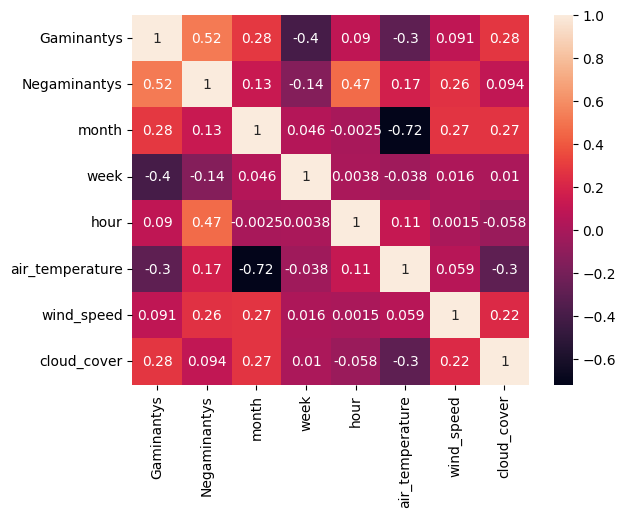

In [62]:
sns.heatmap(data = df_learn.drop(columns=['datetime']).corr(), annot=True)
plt.savefig('PAV/Heatmap.png',  transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None)

In [63]:
X_gam = df_learn.drop(columns=['datetime', 'Gaminantys', 'Negaminantys'])
y_gam = df_learn['Gaminantys']
X_neg = df_learn.drop(columns=['datetime', 'Gaminantys', 'Negaminantys'])
y_neg = df_learn['Negaminantys']

In [470]:
df_learn

,datetime,Gaminantys,Negaminantys,month,week,hour,air_temperature,wind_speed,cloud_cover
0,2023-08-01 00:00:00,7017.462790,510.759334,8,1,0,14.8,2.1,25.0
1,2023-08-01 01:00:00,6830.855757,469.344333,8,1,1,13.8,1.5,25.0
2,2023-08-01 02:00:00,6681.877246,432.295334,8,1,2,13.6,1.7,50.0
3,2023-08-01 03:00:00,6604.817630,420.801000,8,1,3,13.5,1.3,100.0
4,2023-08-01 04:00:00,6875.745963,422.349333,8,1,4,15.0,1.6,0.0
...,...,...,...,...,...,...,...,...,...
2135,2023-10-29 19:00:00,9693.188468,988.985812,10,6,19,2.7,4.6,100.0
2136,2023-10-29 20:00:00,9270.997265,933.634510,10,6,20,4.2,5.6,100.0
2137,2023-10-29 21:00:00,8770.581333,823.117711,10,6,21,5.1,5.1,100.0
2138,2023-10-29 22:00:00,8294.118999,751.613663,10,6,22,6.0,5.0,100.0


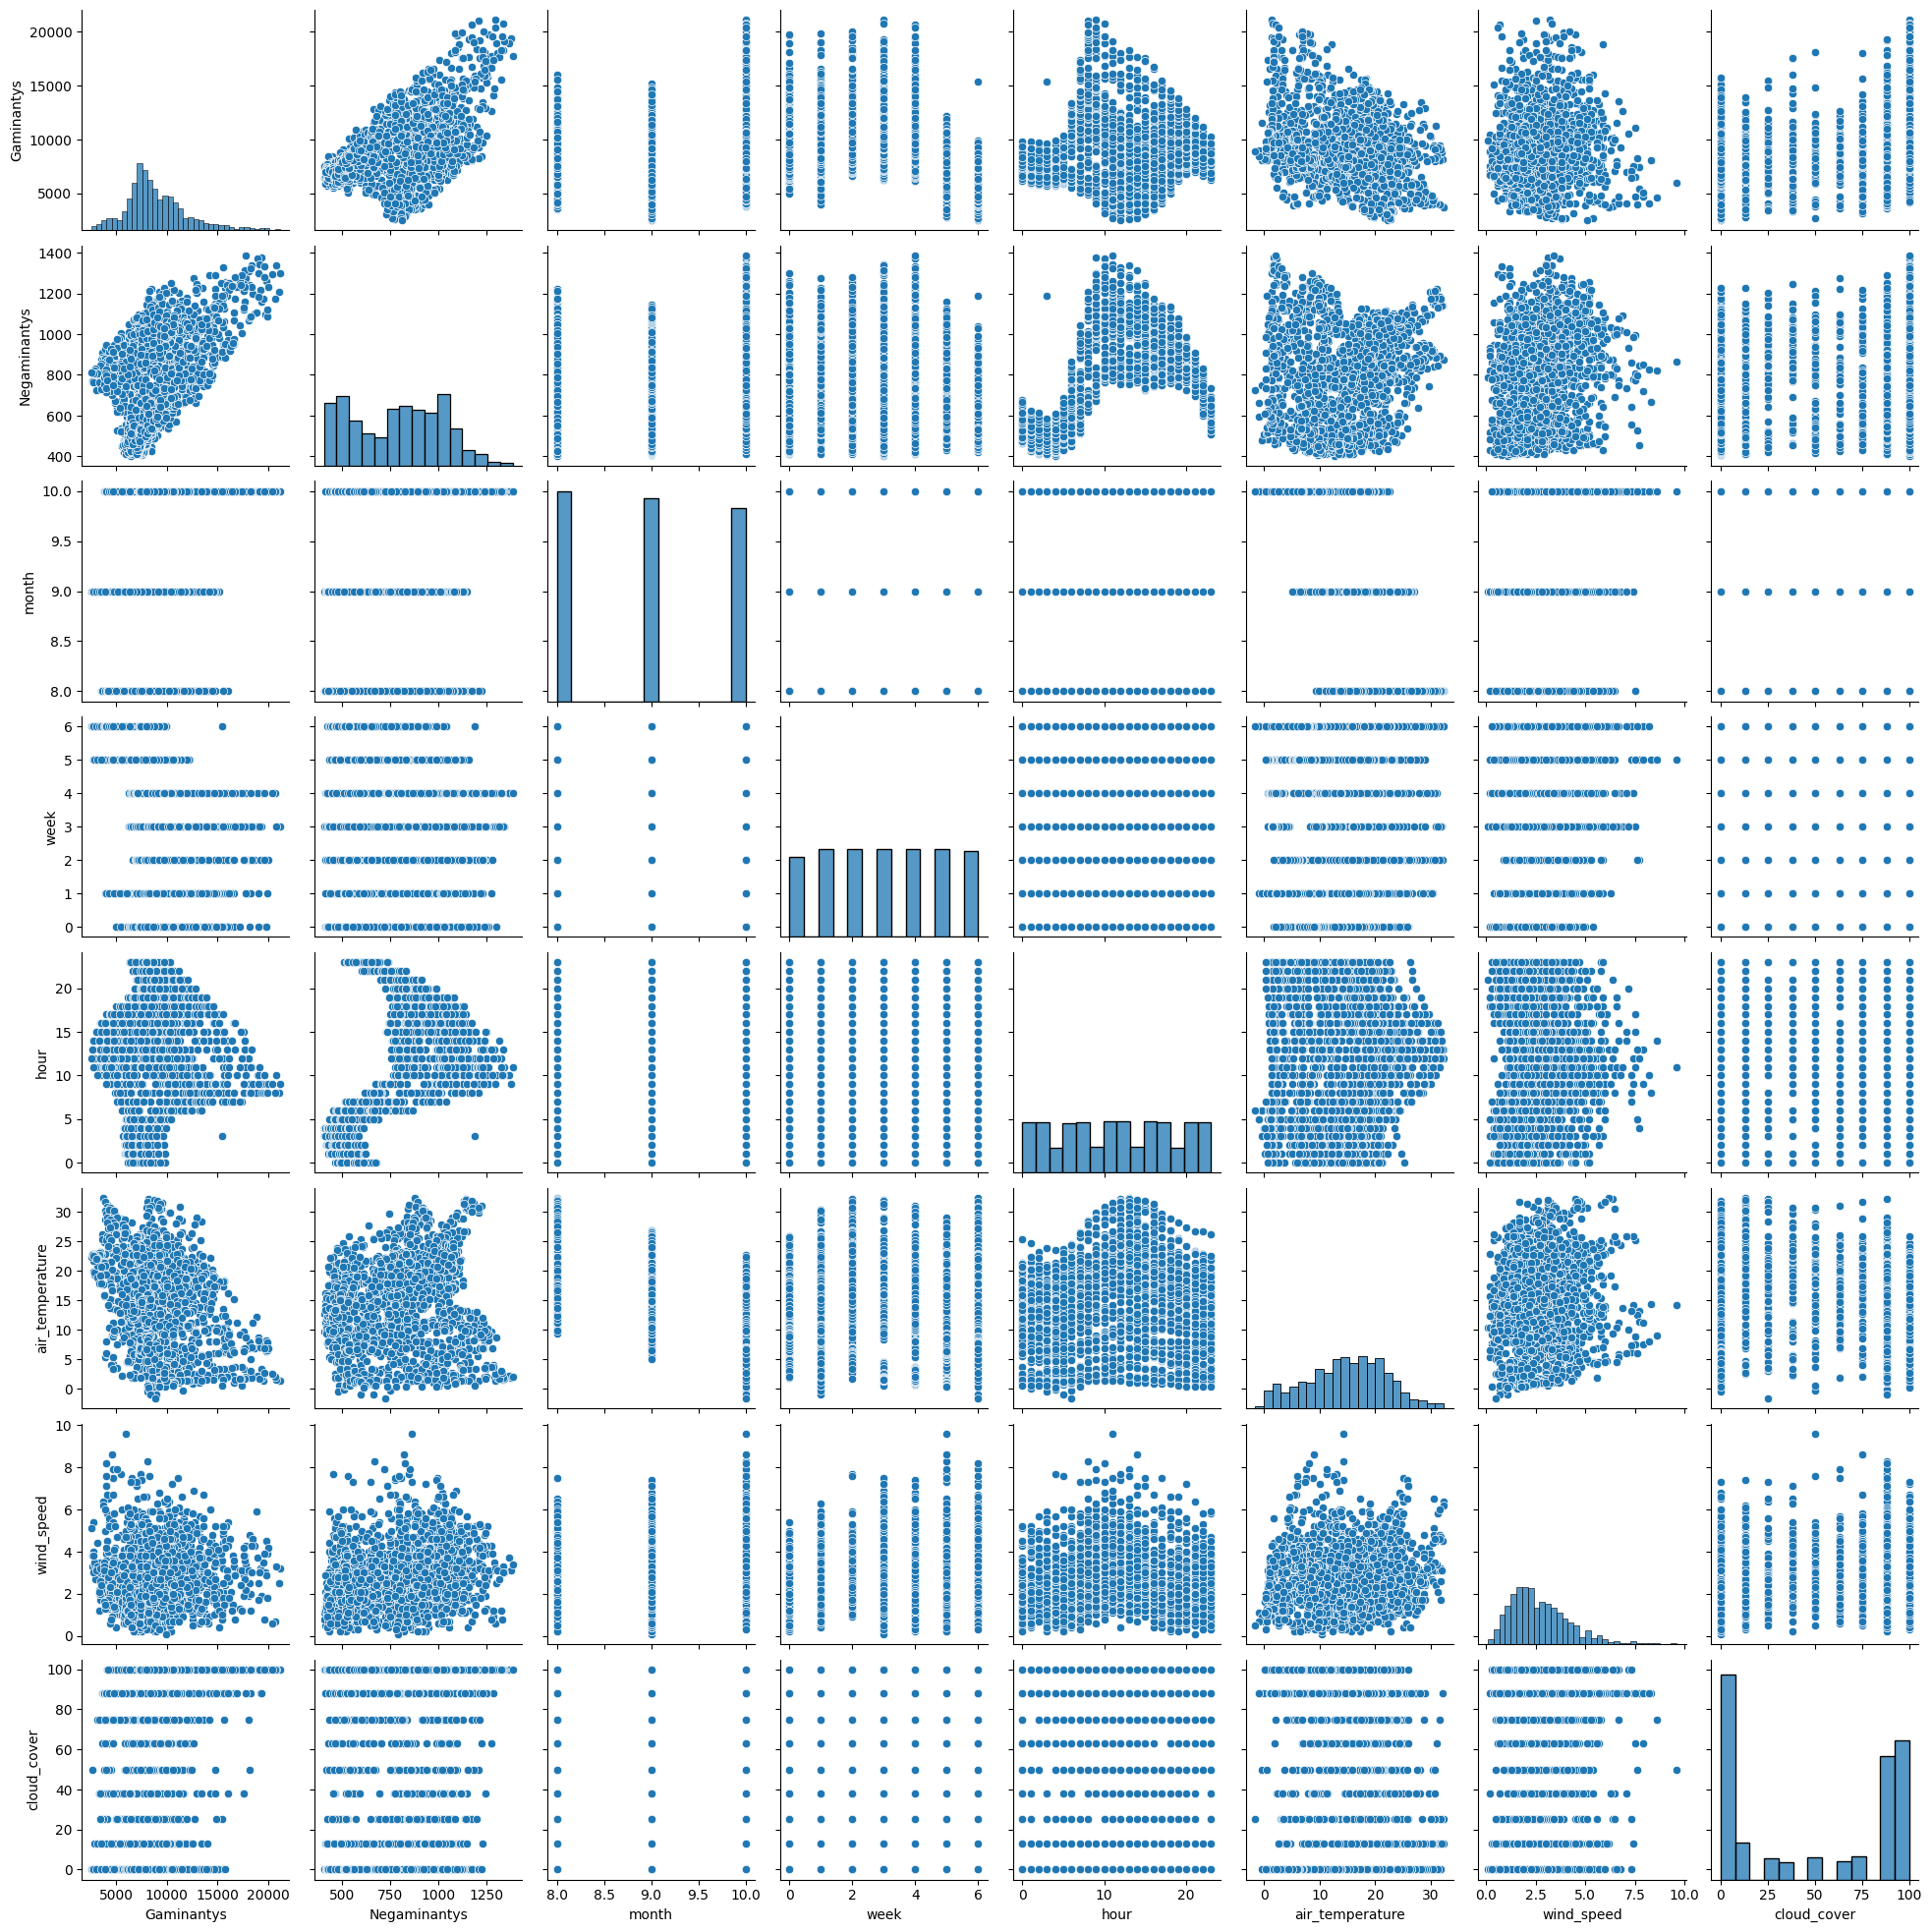

In [64]:
sns.pairplot(data=df_learn.drop(columns=['datetime']))
plt.savefig('PAV/Pairplot.png',  transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None)

In [65]:
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.20, random_state=23)
X_train_gam, X_test_gam, y_train_gam, y_test_gam = train_test_split(X_gam, y_gam, test_size=0.20, random_state=23)

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
decision_gam = DecisionTreeRegressor(random_state = 0).fit(X_train_gam, y_train_gam)
pred_gam = decision_gam.predict(X_test_gam)
decision_gam_rez =f'Gaminančių vartotojų Decision tree vertinimas: \n    Fit score: {decision_gam.score(X_test_gam, y_test_gam)*100.0 } \n    R2 score: {r2_score(y_test_gam, pred_gam)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_gam, pred_gam))} \n    Mean Absolute Error : {mean_absolute_error(y_test_gam, pred_gam)}'
print(decision_gam_rez)
decision_neg = DecisionTreeRegressor(random_state = 0).fit(X_train_neg, y_train_neg)
pred_neg = decision_neg.predict(X_test_neg)
decision_neg_rez = f'Negaminančių vartotojų Decision tree vertinimas: \n    Fit score: {decision_gam.score(X_test_neg, y_test_neg)*100.0 } \n    R2 score: {r2_score(y_test_neg, pred_neg)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_neg, pred_neg))} \n    Mean Absolute Error : {mean_absolute_error(y_test_neg, pred_neg)}'
print(decision_neg_rez)

Gaminančių vartotojų Decision tree vertinimas: 
    Fit score: 74.7315865448359 
    R2 score: 74.7315865448359 
    Root Mean Squared Error: 1486.347155476298 
    Mean Absolute Error : 900.3423658175436
Negaminančių vartotojų Decision tree vertinimas: 
    Fit score: -138390.3938116079 
    R2 score: 94.77850936069765 
    Root Mean Squared Error: 53.98842257782356 
    Mean Absolute Error : 38.64886902747375


In [67]:
from sklearn.metrics import r2_score


In [68]:
from sklearn import svm
sv_gam = svm.SVR(kernel='linear')
sv_gam.fit(X_train_gam, y_train_gam)
pred_gam = sv_gam.predict(X_test_gam)
accuracy = sv_gam.score(X_test_gam, pred_gam)*100
SVM_linear_gam = f"Gaminančių vartotojų SVM linear: \n    Fit score: {accuracy} \n    R2 score: {r2_score(y_test_gam, pred_gam)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_gam, pred_gam))} \n    Mean Absolute Error : {mean_absolute_error(y_test_gam, pred_gam)}"
print(SVM_linear_gam)
sv_neg = svm.SVR(kernel='linear').fit(X_train_neg, y_train_neg)
pred_neg = sv_gam.predict(X_test_neg)
accuracy = sv_gam.score(X_test_neg, pred_neg)*100
SVM_linear_neg = f"Negaminančių vartotojų SVM linear: \n    Fit score: {accuracy} \n    R2 score: {r2_score(y_test_neg, pred_neg)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_neg, pred_neg))} \n    Mean Absolute Error : {mean_absolute_error(y_test_neg, pred_neg)}"
print(SVM_linear_neg)

Gaminančių vartotojų SVM linear: 
    Fit score: 100.0 
    R2 score: 26.77933276966149 
    Root Mean Squared Error: 2530.1607258848617 
    Mean Absolute Error : 1770.6635419516883
Negaminančių vartotojų SVM linear: 
    Fit score: 100.0 
    R2 score: -110033.53355591808 
    Root Mean Squared Error: 7840.85050110539 
    Mean Absolute Error : 7744.869919833693


In [69]:
from sklearn import svm
sv_gam_poly = svm.SVR(kernel='poly').fit(X_train_gam, y_train_gam)
pred_gam = sv_gam_poly.predict(X_test_gam)
accuracy = sv_gam_poly.score(X_test_gam, pred_gam)*100
SVM_poly_gam = f"Gaminančių vartotojų SVM linear: \n    Fit score: {accuracy} \n    R2 score: {r2_score(y_test_gam, pred_gam)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_gam, pred_gam))} \n    Mean Absolute Error : {mean_absolute_error(y_test_gam, pred_gam)}"
print(SVM_poly_gam)
sv_neg_poly = svm.SVR(kernel='poly').fit(X_train_neg, y_train_neg)
pred_neg = sv_gam_poly.predict(X_test_neg)
accuracy = sv_gam_poly.score(X_test_neg, pred_neg)*100
SVM_poly_neg = f"Negaminančių vartotojų SVM linear: \n    Fit score: {accuracy} \n    R2 score: {r2_score(y_test_neg, pred_neg)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_neg, pred_neg))} \n    Mean Absolute Error : {mean_absolute_error(y_test_neg, pred_neg)}"
print(SVM_poly_neg)

Gaminančių vartotojų SVM linear: 
    Fit score: 100.0 
    R2 score: 4.777562381612322 
    Root Mean Squared Error: 2885.366043926833 
    Mean Absolute Error : 2074.073946732593
Negaminančių vartotojų SVM linear: 
    Fit score: 100.0 
    R2 score: -103407.96178708367 
    Root Mean Squared Error: 7601.341864958621 
    Mean Absolute Error : 7584.198323010894


In [70]:
from sklearn import svm
sv_gam_rbf = svm.SVR(kernel='rbf').fit(X_train_gam, y_train_gam)
pred_gam = sv_gam_poly.predict(X_test_gam)
accuracy = sv_gam_poly.score(X_test_gam, pred_gam)*100
SVM_rbf_gam = f"Gaminančių vartotojų SVM linear: \n    Fit score: {accuracy} \n    R2 score: {r2_score(y_test_gam, pred_gam)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_gam, pred_gam))} \n    Mean Absolute Error : {mean_absolute_error(y_test_gam, pred_gam)}"
print(SVM_rbf_gam)
sv_neg_rbf = svm.SVR(kernel='rbf').fit(X_train_neg, y_train_neg)
pred_neg = sv_gam_poly.predict(X_test_neg)
accuracy = sv_gam_poly.score(X_test_neg, pred_neg)*100
SVM_rbf_neg = f"Negaminančių vartotojų SVM linear: \n    Fit score: {accuracy} \n    R2 score: {r2_score(y_test_neg, pred_neg)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_neg, pred_neg))} \n    Mean Absolute Error : {mean_absolute_error(y_test_neg, pred_neg)}"
print(SVM_rbf_neg)

Gaminančių vartotojų SVM linear: 
    Fit score: 100.0 
    R2 score: 4.777562381612322 
    Root Mean Squared Error: 2885.366043926833 
    Mean Absolute Error : 2074.073946732593
Negaminančių vartotojų SVM linear: 
    Fit score: 100.0 
    R2 score: -103407.96178708367 
    Root Mean Squared Error: 7601.341864958621 
    Mean Absolute Error : 7584.198323010894


In [71]:
random_gam = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_gam, y_train_gam)
pred_gam = random_gam.predict(X_test_gam)
randomforest_gam = f'Gaminančių vartotojų Random forest vertinimas: \n    Fit score: {random_gam.score(X_test_gam, y_test_gam)*100.0} \n    R2 score: {r2_score(y_test_gam, pred_gam)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_gam, pred_gam))} \n    Mean Absolute Error : {mean_absolute_error(y_test_gam, pred_gam)}'
print(randomforest_gam)
random_neg = RandomForestRegressor(n_estimators=1000, random_state=42).fit(X_train_neg, y_train_neg)
pred_neg = random_neg.predict(X_test_neg)
randomforest_neg = f'Negaminančių vartotojų Random forest vertinimas: \n    Fit score: {random_neg.score(X_test_neg, y_test_neg)*100.0} \n    R2 score: {r2_score(y_test_neg, pred_neg)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_neg, pred_neg))} \n    Mean Absolute Error : {mean_absolute_error(y_test_neg, pred_neg)}'
print(randomforest_neg)

Gaminančių vartotojų Random forest vertinimas: 
    Fit score: 88.97542854694086 
    R2 score: 88.97542854694086 
    Root Mean Squared Error: 981.7753580974642 
    Mean Absolute Error : 626.0512910369943
Negaminančių vartotojų Random forest vertinimas: 
    Fit score: 97.35175902049828 
    R2 score: 97.35175902049828 
    Root Mean Squared Error: 38.448742242298394 
    Mean Absolute Error : 27.844259098462555


In [72]:
linear_gam = LinearRegression().fit(X_train_gam, y_train_gam)
pred_gam = linear_gam.predict(X_test_gam)
linearreg_gam = f'Gaminančių vartotojų linijinės vertinimas: \n    Fit score: {linear_gam.score(X_test_gam, y_test_gam)*100.0} \n    R2 score: {r2_score(y_test_gam, pred_gam)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_gam, pred_gam))} \n    Mean Absolute Error : {mean_absolute_error(y_test_gam, pred_gam)}'
print(linearreg_gam)
linear_neg = LinearRegression().fit(X_train_neg, y_train_neg)
pred_neg = linear_neg.predict(X_test_neg)
linearreg_neg = f'Negaminančių vartotojų linijinės vertinimas: \n    Fit score: {linear_neg.score(X_test_neg, y_test_neg)*100.0} \n    R2 score: {r2_score(y_test_neg, pred_neg)*100} \n    Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_neg, pred_neg))} \n    Mean Absolute Error : {mean_absolute_error(y_test_neg, pred_neg)}'
print(linearreg_neg)

Gaminančių vartotojų linijinės vertinimas: 
    Fit score: 30.573025488301553 
    R2 score: 30.573025488301553 
    Root Mean Squared Error: 2463.742919069633 
    Mean Absolute Error : 1817.7504003374847
Negaminančių vartotojų linijinės vertinimas: 
    Fit score: 36.48219540059604 
    R2 score: 36.48219540059604 
    Root Mean Squared Error: 188.30034950316357 
    Mean Absolute Error : 147.66570231105135


In [ ]:
X_train_gam

,month,week,hour,air_temperature,wind_speed,cloud_cover
1762,10,4,20,11.4,4.6,100.0
825,9,0,13,20.2,2.4,25.0
1966,10,6,12,8.8,2.3,100.0
1601,10,5,3,12.9,5.6,100.0
1926,10,4,16,2.1,3.9,88.0
...,...,...,...,...,...,...
1512,10,1,10,20.3,3.4,13.0
1993,10,0,15,10.1,1.2,100.0
1064,9,3,12,16.3,3.9,100.0
742,9,4,1,12.7,2.3,13.0


In [73]:
start_date = '2023-10-30 00:00'
end_date = '2023-10-30 23:00'

gaminantys = generate_datetime_range(start=start_date, end=end_date)
negaminantys = generate_datetime_range(start=start_date, end=end_date)

gaminantys = pd.merge(gaminantys,orai_for_merge, on='datetime')
negaminantys = pd.merge(negaminantys,orai_for_merge, on='datetime')

gaminantys_mod = gaminantys.drop(columns=['datetime', 'day'])
negaminantys_mod = negaminantys.drop(columns=['datetime', 'day'])

gaminantys['decision_tree'] = decision_gam.predict(gaminantys_mod)
negaminantys['decision_tree'] = decision_neg.predict(negaminantys_mod)
gaminantys['sv_linear'] = sv_gam.predict(gaminantys_mod)
negaminantys['sv_linear'] = sv_neg.predict(negaminantys_mod)
gaminantys['sv_poly'] = sv_gam_poly.predict(gaminantys_mod)
negaminantys['sv_poly'] = sv_neg_poly.predict(negaminantys_mod)
gaminantys['sv_rbf'] = sv_gam_rbf.predict(gaminantys_mod)
negaminantys['sv_rbf'] = sv_neg_rbf.predict(negaminantys_mod)
gaminantys['random_forest'] = random_gam.predict(gaminantys_mod)
negaminantys['random_forest'] = random_neg.predict(negaminantys_mod)
gaminantys['linear_regression'] = linear_gam.predict(gaminantys_mod)
negaminantys['linear_regression'] = linear_neg.predict(negaminantys_mod)



In [564]:
gaminantys

,datetime,month,week,day,hour,air_temperature,wind_speed,cloud_cover,decision_tree,sv_poly,sv_rbf,random_forest,decision_tree_g,sv_poly_g,sv_rbf_g,random_forest_g
0,2025-01-12 00:00:00,1,2,12,0,-0.9,1.4,100,9617.211733,8915.703440,8413.611478,8802.422736,9617.211733,8915.703440,8413.611478,8802.422736
1,2025-01-12 01:00:00,1,2,12,1,-1.0,1.7,100,9617.211733,8927.836274,8415.044836,8736.731265,9617.211733,8927.836274,8415.044836,8736.731265
2,2025-01-12 02:00:00,1,2,12,2,-1.0,1.4,100,9617.211733,8938.639796,8416.343367,8775.498621,9617.211733,8938.639796,8416.343367,8775.498621
3,2025-01-12 03:00:00,1,2,12,3,-1.0,1.6,100,9617.211733,8950.283508,8417.667029,8718.790716,9617.211733,8950.283508,8417.667029,8718.790716
4,2025-01-12 04:00:00,1,2,12,4,-1.2,1.0,100,9617.211733,8961.455186,8418.805468,8806.006162,9617.211733,8961.455186,8418.805468,8806.006162
5,2025-01-12 05:00:00,1,2,12,5,-1.0,1.3,100,9617.211733,8972.538424,8420.051966,9162.741976,9617.211733,8972.538424,8420.051966,9162.741976
6,2025-01-12 06:00:00,1,2,12,6,-1.0,1.5,100,10188.576320,8984.290996,8421.218141,10631.856524,10188.576320,8984.290996,8421.218141,10631.856524
7,2025-01-12 07:00:00,1,2,12,7,-0.8,1.1,100,10687.614872,8994.299771,8422.234461,13394.148257,10687.614872,8994.299771,8422.234461,13394.148257
8,2025-01-12 08:00:00,1,2,12,8,-0.6,1.1,100,14542.395772,9005.005854,8423.258633,15395.908709,14542.395772,9005.005854,8423.258633,15395.908709
9,2025-01-12 09:00:00,1,2,12,9,-0.5,1.3,88,11194.051443,8675.774859,8408.215803,14246.958166,11194.051443,8675.774859,8408.215803,14246.958166


In [74]:
datefrom = datetime(2023,10,29,23)
dateto = datetime(2023,10,31,0)
b2b_gv_filtered = b2b_gv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2b_ngv_filtered = b2b_ngv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2c_gv_filtered = b2c_gv.query('dateTime > @datefrom & dateTime < @dateto')
b2c_ngv_filtered = b2c_ngv.query('dateTime > @datefrom & dateTime < @dateto')

columns_to_sum_b2bgv = b2b_gv_filtered.drop(columns=['data_valanda']).columns
columns_to_sum_b2bngv = b2b_ngv_filtered.drop(columns=['data_valanda']).columns
columns_to_sum_b2cgv = b2c_gv_filtered.drop(columns=['dateTime']).columns
columns_to_sum_b2cngv = b2c_ngv_filtered.drop(columns=['dateTime']).columns

b2b_gv_filtered['b2b_gv'] = b2b_gv_filtered[columns_to_sum_b2bgv].sum(axis=1)
b2b_ngv_filtered['b2b_ngv'] = b2b_ngv_filtered[columns_to_sum_b2bngv].sum(axis=1)
b2c_gv_filtered['b2c_gv'] = b2c_gv_filtered[columns_to_sum_b2cgv].sum(axis=1)
b2c_ngv_filtered['b2c_ngv'] = b2c_ngv_filtered[columns_to_sum_b2cngv].sum(axis=1)

b2b_gv_filtered['datetime'] = b2b_gv_filtered['data_valanda']
b2b_ngv_filtered['datetime'] = b2b_ngv_filtered['data_valanda']
b2c_gv_filtered['datetime'] = b2c_gv_filtered['dateTime']
b2c_ngv_filtered['datetime'] = b2c_ngv_filtered['dateTime']

b2b_gv_filtered = b2b_gv_filtered[['datetime', 'b2b_gv']]
b2b_ngv_filtered = b2b_ngv_filtered[['datetime', 'b2b_ngv']]
b2c_gv_filtered = b2c_gv_filtered[['datetime', 'b2c_gv']]
b2c_ngv_filtered = b2c_ngv_filtered[['datetime', 'b2c_ngv']]

gam_vart = pd.merge(b2b_gv_filtered,b2c_gv_filtered, on='datetime')
neg_vart = pd.merge(b2b_ngv_filtered,b2c_ngv_filtered, on='datetime')

gam_vart['Faktas'] = gam_vart[['b2b_gv', 'b2c_gv']].sum(axis=1)
neg_vart['Faktas'] = neg_vart[['b2b_ngv', 'b2c_ngv']].sum(axis=1)

gam_vart = gam_vart[['datetime','Faktas']]
neg_vart = neg_vart[['datetime','Faktas']]

In [75]:
gaminantys = pd.merge(gaminantys,gam_vart,on='datetime')
negaminantys = pd.merge(negaminantys,neg_vart,on='datetime')

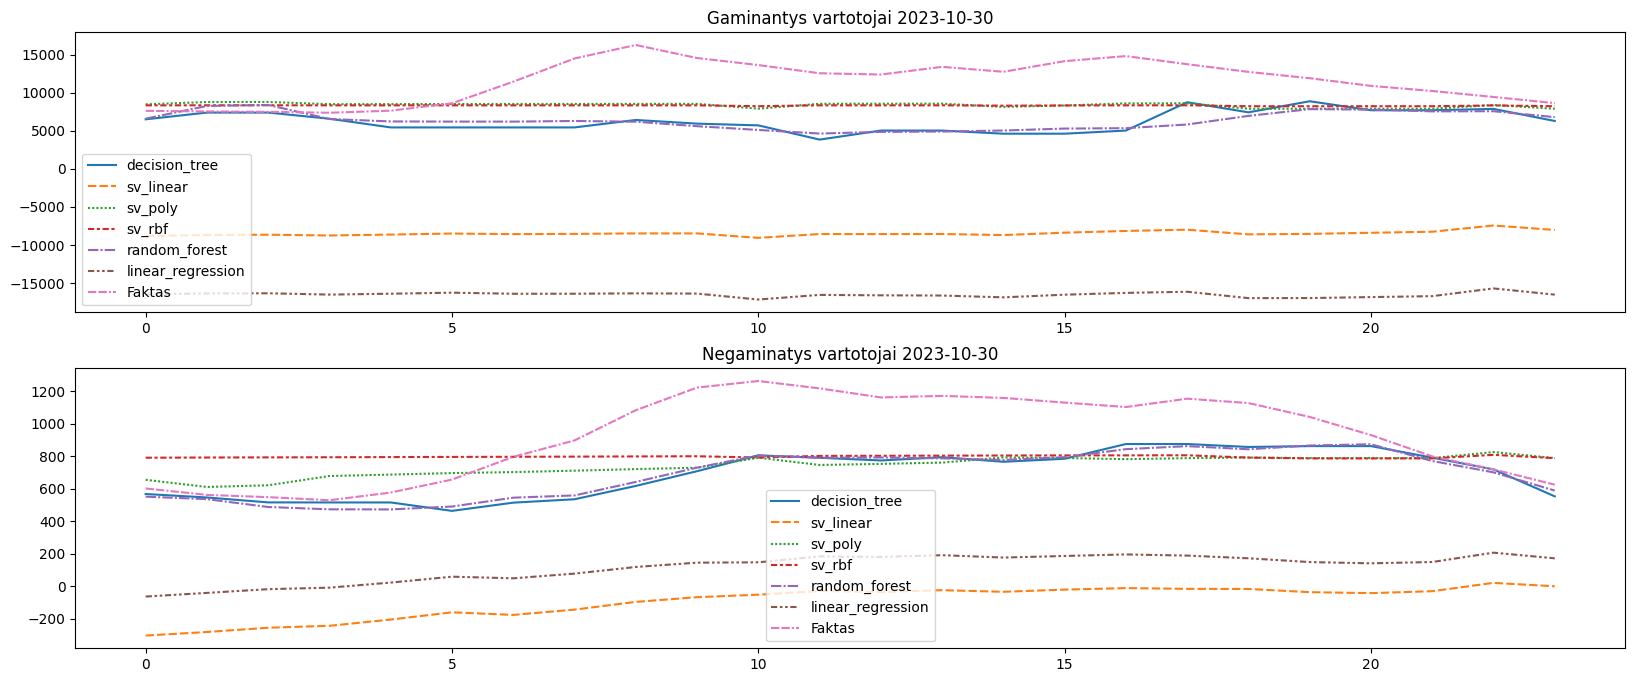

In [76]:
df_gam = gaminantys.drop(columns=['month', 'week', 'day', 'hour', 'air_temperature', 'wind_speed', 'cloud_cover'])
df_neg = negaminantys.drop(columns=['month', 'week', 'day', 'hour', 'air_temperature', 'wind_speed', 'cloud_cover'])

fig, axes = plt.subplots(2,figsize=(20,8))
axes[0].set_title(f'Gaminantys vartotojai 2023-10-30')
sns.lineplot(data=df_gam,ax=axes[0])
axes[1].set_title(f'Negaminatys vartotojai 2023-10-30')
sns.lineplot(data=df_neg,ax=axes[1])

plt.savefig('PAV/Modeliai.png',  transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None)

plt.show()

In [77]:
orai = pd.read_json('../../../weather_data_vilnius1.json')
orai['datetime'] = pd.to_datetime(orai['obs_time_utc'])
orai_for_merge = orai[['datetime', 'air_temperature', 'wind_speed', 'cloud_cover']]

In [487]:
orai_for_merge

,datetime,air_temperature,wind_speed,cloud_cover
0,2025-01-12 00:00:00,-0.9,1.4,100
1,2025-01-12 01:00:00,-1.0,1.7,100
2,2025-01-12 02:00:00,-1.0,1.4,100
3,2025-01-12 03:00:00,-1.0,1.6,100
4,2025-01-12 04:00:00,-1.2,1.0,100
5,2025-01-12 05:00:00,-1.0,1.3,100
6,2025-01-12 06:00:00,-1.0,1.5,100
7,2025-01-12 07:00:00,-0.8,1.1,100
8,2025-01-12 08:00:00,-0.6,1.1,100
9,2025-01-12 09:00:00,-0.5,1.3,88


In [78]:
start_date = '2025-01-12 00:00'
end_date = '2025-01-12 23:00'

gaminantys = generate_datetime_range(start=start_date, end=end_date)
negaminantys = generate_datetime_range(start=start_date, end=end_date)

gaminantys = pd.merge(gaminantys,orai_for_merge, on='datetime')
negaminantys = pd.merge(negaminantys,orai_for_merge, on='datetime')

gaminantys_mod = gaminantys.drop(columns=['datetime', 'day'])
negaminantys_mod = negaminantys.drop(columns=['datetime', 'day'])

gaminantys['decision_tree'] = decision_gam.predict(gaminantys_mod)
negaminantys['decision_tree'] = decision_neg.predict(negaminantys_mod)
gaminantys['sv_poly'] = sv_gam_poly.predict(gaminantys_mod)
negaminantys['sv_poly'] = sv_neg_poly.predict(negaminantys_mod)
gaminantys['sv_rbf'] = sv_gam_rbf.predict(gaminantys_mod)
negaminantys['sv_rbf'] = sv_neg_rbf.predict(negaminantys_mod)
gaminantys['random_forest'] = random_gam.predict(gaminantys_mod)
negaminantys['random_forest'] = random_neg.predict(negaminantys_mod)


In [79]:
gaminantys['decision_tree_g'] = gaminantys['decision_tree']
gaminantys['sv_poly_g'] = gaminantys['sv_poly']
gaminantys['sv_rbf_g'] = gaminantys['sv_rbf']
gaminantys['random_forest_g'] = gaminantys['random_forest']
gaminantys_merge = gaminantys[['datetime', 'hour', 'decision_tree_g', 'sv_poly_g', 'sv_rbf_g', 'random_forest_g']]
negaminantys_merge = negaminantys[['datetime', 'decision_tree', 'sv_poly', 'sv_rbf', 'random_forest']]

merged_prog = pd.merge(gaminantys_merge, negaminantys_merge, on='datetime')

In [80]:
merged_prog['Decission_Tree'] = merged_prog[['decision_tree_g', 'decision_tree']].sum(axis=1)
merged_prog['SV_Poly'] = merged_prog[['sv_poly_g', 'sv_poly']].sum(axis=1)
merged_prog['SV_RBF'] = merged_prog[['sv_rbf_g', 'sv_rbf']].sum(axis=1)
merged_prog['Random_Forest'] = merged_prog[['random_forest_g', 'random_forest']].sum(axis=1)
merged = merged_prog[['datetime', 'hour', 'Decission_Tree', 'SV_Poly', 'SV_RBF', 'Random_Forest']]

In [430]:
merged

,datetime,hour,Decission_Tree,SV_Poly,SV_RBF,Random_Forest
0,2025-01-12 00:00:00,0,10233.069373,9573.333768,9205.154321,9331.757702
1,2025-01-12 01:00:00,1,10233.069373,9595.102963,9207.795683,9263.476289
2,2025-01-12 02:00:00,2,10233.069373,9614.698157,9210.253368,9272.086861
3,2025-01-12 03:00:00,3,10804.784703,9635.915524,9212.812940,9257.088278
4,2025-01-12 04:00:00,4,10214.654733,9655.328535,9215.025536,9459.159231
5,2025-01-12 05:00:00,5,10214.654733,9676.296718,9217.586407,9831.816467
6,2025-01-12 06:00:00,6,11000.217487,9697.685793,9219.999951,11362.700698
7,2025-01-12 07:00:00,7,11730.275087,9716.544763,9222.237436,14437.497981
8,2025-01-12 08:00:00,8,15750.044621,9736.762093,9224.541782,16586.346833
9,2025-01-12 09:00:00,9,12488.746352,9439.802561,9211.218861,15178.848150


In [93]:
nordpool = pd.read_csv('DATA/nordpool.csv')
nordpool['Faktas'] = nordpool['cons'].apply(lambda x: x*8.25)

In [94]:
nordpool['hour'] = pd.to_datetime(nordpool['datetime']).dt.hour

In [95]:
nordpool_new = nordpool[['hour', 'Faktas']].groupby('hour').sum().reset_index()

In [96]:
nordpool_new

,hour,Faktas
0,0,10991.475
1,1,10517.100
2,2,10257.225
3,3,10096.350
4,4,10059.225
5,5,10225.875
6,6,10683.750
7,7,11286.000
8,8,11875.875
9,9,12639.000


In [97]:
rezultatas = pd.merge(merged,nordpool_new, on='hour')

In [98]:
rezultatas

,datetime,hour,Decission_Tree,SV_Poly,SV_RBF,Random_Forest,Faktas
0,2025-01-12 00:00:00,0,10233.069373,9573.333768,9205.154321,9448.296532,10991.475
1,2025-01-12 01:00:00,1,10233.069373,9595.102963,9207.795683,9377.429182,10517.100
2,2025-01-12 02:00:00,2,10233.069373,9614.698157,9210.253368,9403.677915,10257.225
3,2025-01-12 03:00:00,3,10804.784703,9635.915524,9212.812940,9376.383073,10096.350
4,2025-01-12 04:00:00,4,10214.654733,9655.328535,9215.025536,9529.826390,10059.225
5,2025-01-12 05:00:00,5,10214.654733,9676.296718,9217.586407,9846.943494,10225.875
6,2025-01-12 06:00:00,6,11000.217487,9697.685793,9219.999951,11418.878360,10683.750
7,2025-01-12 07:00:00,7,11730.275087,9716.544763,9222.237436,14326.977035,11286.000
8,2025-01-12 08:00:00,8,15750.044621,9736.762093,9224.541782,16565.850763,11875.875
9,2025-01-12 09:00:00,9,12488.746352,9439.802561,9211.218861,15500.382848,12639.000


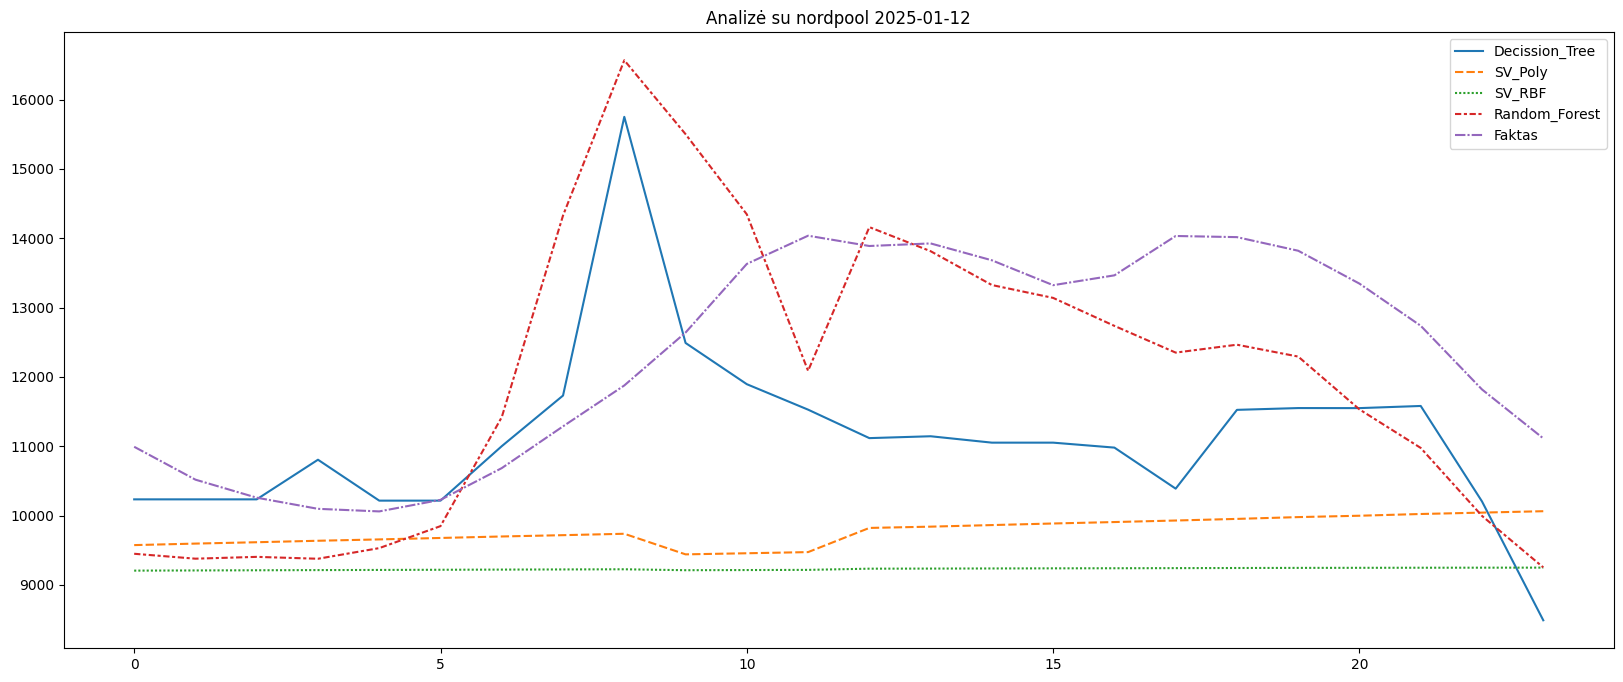

In [99]:
df = rezultatas.drop(columns=['hour'])

fig, axes = plt.subplots(figsize=(20,8))
axes.set_title(f'Analizė su nordpool 2025-01-12')
sns.lineplot(data=df,ax=axes)
plt.savefig('PAV/nordpool_lyginimas.png',  transparent=None, dpi='figure', format=None,
        metadata=None, bbox_inches=None, pad_inches=0.1,
        facecolor='auto', edgecolor='auto', backend=None)
plt.show()

In [86]:
datefrom = datetime(2023,9,30,23)
dateto = datetime(2023,11,1,0)
b2b_gv_filtered = b2b_gv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2b_ngv_filtered = b2b_ngv.query('data_valanda > @datefrom & data_valanda < @dateto')
b2c_gv_filtered = b2c_gv.query('dateTime > @datefrom & dateTime < @dateto')
b2c_ngv_filtered = b2c_ngv.query('dateTime > @datefrom & dateTime < @dateto')

columns_to_sum_b2bgv = b2b_gv_filtered.drop(columns=['data_valanda']).columns
columns_to_sum_b2bngv = b2b_ngv_filtered.drop(columns=['data_valanda']).columns
columns_to_sum_b2cgv = b2c_gv_filtered.drop(columns=['dateTime']).columns
columns_to_sum_b2cngv = b2c_ngv_filtered.drop(columns=['dateTime']).columns

b2b_gv_filtered['b2b_gv'] = b2b_gv_filtered[columns_to_sum_b2bgv].sum(axis=1)
b2b_ngv_filtered['b2b_ngv'] = b2b_ngv_filtered[columns_to_sum_b2bngv].sum(axis=1)
b2c_gv_filtered['b2c_gv'] = b2c_gv_filtered[columns_to_sum_b2cgv].sum(axis=1)
b2c_ngv_filtered['b2c_ngv'] = b2c_ngv_filtered[columns_to_sum_b2cngv].sum(axis=1)

b2b_gv_filtered['datetime'] = b2b_gv_filtered['data_valanda']
b2b_ngv_filtered['datetime'] = b2b_ngv_filtered['data_valanda']
b2c_gv_filtered['datetime'] = b2c_gv_filtered['dateTime']
b2c_ngv_filtered['datetime'] = b2c_ngv_filtered['dateTime']

b2b_gv_filtered = b2b_gv_filtered[['datetime', 'b2b_gv']]
b2b_ngv_filtered = b2b_ngv_filtered[['datetime', 'b2b_ngv']]
b2c_gv_filtered = b2c_gv_filtered[['datetime', 'b2c_gv']]
b2c_ngv_filtered = b2c_ngv_filtered[['datetime', 'b2c_ngv']]

gam_vart = pd.merge(b2b_gv_filtered,b2c_gv_filtered,how='left', on='datetime')
neg_vart = pd.merge(b2b_ngv_filtered,b2c_ngv_filtered,how='left', on='datetime')

gam_vart['Faktas'] = gam_vart[['b2b_gv', 'b2c_gv']].sum(axis=1)
neg_vart['Faktas'] = neg_vart[['b2b_ngv', 'b2c_ngv']].sum(axis=1)

gam_vart = gam_vart[['datetime','Faktas']]
neg_vart = neg_vart[['datetime','Faktas']]

In [504]:
gam_vart

,datetime,Faktas
0,2023-10-01 00:00:00,6150.278975
1,2023-10-01 01:00:00,6028.271292
2,2023-10-01 02:00:00,5930.317800
3,2023-10-01 03:00:00,5917.736751
4,2023-10-01 04:00:00,5860.051312
...,...,...
739,2023-10-31 19:00:00,10314.749532
740,2023-10-31 20:00:00,8651.471208
741,2023-10-31 21:00:00,7750.662532
742,2023-10-31 22:00:00,7354.857610


In [87]:
suma = gam_vart['Faktas'].sum()+neg_vart['Faktas'].sum()
min_gam = gam_vart['Faktas'].min()
min_neg = neg_vart['Faktas'].min()
print(suma,min_gam,min_neg)

8398474.548720269 3814.3959320219356 393.49258699999996


In [ ]:
# X{array-like, sparse matrix} of shape (n_samples, n_features)
# Training data.

# yarray-like of shape (n_samples,) or (n_samples, n_targets)
# Target values. Will be cast to X’s dtype if necessary.

In [88]:
from docx import Document
from docx.shared import Inches

document = Document()

document.add_heading('Mašininio mokymosi modeliai', 0)

document.add_paragraph('Atliko: Mantas Dzimidas')

document.add_paragraph(
    'Paruošto mokymui dataframe Heatmap', style='List Number'
)

document.add_picture('PAV/Heatmap.png', width=Inches(6))

document.add_page_break()

document.add_paragraph(
    'Paruošto mokymui dataframe Pairplot', style='List Number'
)

document.add_picture('PAV/Pairplot.png', width=Inches(6))

document.add_page_break()

document.add_paragraph(
    'Modelių rezultatai', style='List Number'
)
document.add_paragraph(decision_gam_rez)
document.add_paragraph(decision_neg_rez)
document.add_paragraph(SVM_linear_gam)
document.add_paragraph(SVM_linear_neg)
document.add_paragraph(SVM_poly_gam)
document.add_paragraph(SVM_poly_neg)
document.add_paragraph(SVM_rbf_gam)
document.add_paragraph(SVM_rbf_neg)
document.add_paragraph(randomforest_gam)
document.add_paragraph(randomforest_neg)
document.add_paragraph(linearreg_gam)
document.add_paragraph(linearreg_neg)

document.add_page_break()

document.add_paragraph(
    'Modelių apmokymas', style='List Number'
)

document.add_picture('PAV/Modeliai.png', width=Inches(6))

document.add_paragraph(
    'Modelių lyginimas su Nordpool', style='List Number'
)

document.add_picture('PAV/nordpool_lyginimas.png', width=Inches(6))

document.add_page_break()

document.add_paragraph(
    'Rezultatai', style='List Number'
)

t = document.add_table(df.shape[0]+1, df.shape[1])

for j in range(df.shape[-1]):
    t.cell(0,j).text = df.columns[j]

for i in range(df.shape[0]):
    for j in range(df.shape[-1]):
        t.cell(i+1,j).text = str(df.values[i,j])

# document.add_page_break()

document.save('Mašininiai modeliai.docx')

In [589]:
df

,datetime,Decission_Tree,SV_Poly,SV_RBF,Random_Forest,Faktas
0,2025-01-12 00:00:00,10233.069373,9573.333768,9205.154321,9448.296532,1332.3
1,2025-01-12 01:00:00,10233.069373,9595.102963,9207.795683,9377.429182,1274.8
2,2025-01-12 02:00:00,10233.069373,9614.698157,9210.253368,9403.677915,1243.3
3,2025-01-12 03:00:00,10804.784703,9635.915524,9212.812940,9376.383073,1223.8
4,2025-01-12 04:00:00,10214.654733,9655.328535,9215.025536,9529.826390,1219.3
5,2025-01-12 05:00:00,10214.654733,9676.296718,9217.586407,9846.943494,1239.5
6,2025-01-12 06:00:00,11000.217487,9697.685793,9219.999951,11418.878360,1295.0
7,2025-01-12 07:00:00,11730.275087,9716.544763,9222.237436,14326.977035,1368.0
8,2025-01-12 08:00:00,15750.044621,9736.762093,9224.541782,16565.850763,1439.5
9,2025-01-12 09:00:00,12488.746352,9439.802561,9211.218861,15500.382848,1532.0


In [ ]:
# https://www.edlitera.com/blog/posts/regression-perfomance-measures#mcetoc_1h2io7aic6 

In [ ]:
# Užduotis - paskaičiuoti geriausio modelio spėjimo įverčius (R2 score, etc), lyginannt spėjimą su NordPool
# faktu.

# Užduotis - parašyti skriptą, kuris pateiktų prognozę tiesiog skaičiuodamas vidutines vertes (pagal vidurkius)
# Palyginkite šio skripto prognozės tikslumą su dviem savo geriausiais modeliais 
# (pagal koreliacijos koef, R2 score, MAE, MSE, RMSE ...)

In [ ]:
# https://data.nordpoolgroup.com/auction/day-ahead/volumes?deliveryDate=2025-01-09&deliveryAreas=LT,AT 